# Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
train_file_path = '/content/re3d-train.conll'
test_file_path = '/content/re3d-test.conll'

In [ ]:
def load_conll(file_path):
    """
    Load a dataset in CONLL-03 format.

    Parameters:
    file_path (str): Path to the CONLL-03 formatted file.

    Returns:
    pd.DataFrame: A DataFrame containing three columns: 'Word', 'IOB', and 'Entity'.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    data = []
    for line in lines:
        line = line.strip()
        if line:  # Ignore empty lines
            parts = line.split()
            if len(parts) == 2:  # Case with two columns (word and IOB label)
                word, iob_entity = parts
                if iob_entity == 'O':
                    data.append([word, 'O', 'O'])  # If the entity is 'O', it means there is no entity
                else:
                    iob, entity = iob_entity.split('-')  # Separate the IOB tag from the entity type
                    data.append([word, iob, entity])

    # Create a DataFrame for easier visualization
    df = pd.DataFrame(data, columns=["Word", "IOB", "Entity"])
    return df



In [ ]:
# Loading training and testing data
train_df = load_conll(train_file_path)
test_df = load_conll(test_file_path)

In [ ]:
# Data exploration
print("First rows of the training dataset:")
print(train_df.head())

print("\nFirst rows of the test dataset:")
print(test_df.head())

# Basic statistics
print("\nStatistiche di base del dataset di addestramento:")
print(train_df.describe())

print("\nBasic statistics of the training dataset:")
print(test_df.describe())

# Unique Entity Control
print("\nUnique entities in the training dataset:")
print(train_df['Entity'].value_counts())

print("\nUnique entities in the test dataset:")
print(test_df['Entity'].value_counts())

Prime righe del dataset di addestramento:
        Word IOB Entity
0  Operation   O      O
1      Steel   O      O
2    Curtain   O      O
3          (   O      O
4     Arabic   O      O

Prime righe del dataset di test:
      Word IOB  Entity
0   Carter   B  Person
1  thanked   O       O
2    Abadi   B  Person
3      for   O       O
4   nearly   O       O

Statistiche di base del dataset di addestramento:
         Word    IOB Entity
count   20030  20030  20030
unique   3752      3     11
top       the      O      O
freq      959  13747  13747

Statistiche di base del dataset di test:
        Word   IOB Entity
count   5258  5258   5258
unique  1738     3     11
top      the     O      O
freq     266  3672   3672

Entità uniche nel dataset di addestramento:
Entity
O                    13747
Organisation          2643
Location              1428
Person                1016
Temporal               402
Quantity               244
DocumentReference      196
Weapon                 151
MilitaryPla

In [ ]:
def dataset_summary(df):
    """
    Function to get a summary of the dataset.
    """
    print(f"Number of rows: {len(df)}")
    print(f"Number of unique entities: {df['Entity'].nunique()}")
    print(f"Number of unique labels: {df['IOB'].nunique()}")
    print(f"Top 10 most frequent entities:\n{df['Entity'].value_counts().head(10)}")
    print(f"Top 10 most frequent words:\n{df['Word'].value_counts().head(10)}")

In [ ]:
print("\nTraining dataset summary:")
dataset_summary(train_df)


Riepilogo del dataset di addestramento:
Numero di righe: 20030
Numero di entità uniche: 11
Numero di etichette uniche: 3
Le 10 entità più frequenti:
Entity
O                    13747
Organisation          2643
Location              1428
Person                1016
Temporal               402
Quantity               244
DocumentReference      196
Weapon                 151
MilitaryPlatform       111
Money                   56
Name: count, dtype: int64
Le 10 parole più frequenti:
Word
the    959
,      948
.      773
and    560
of     547
to     511
in     408
a      291
"      248
-      213
Name: count, dtype: int64


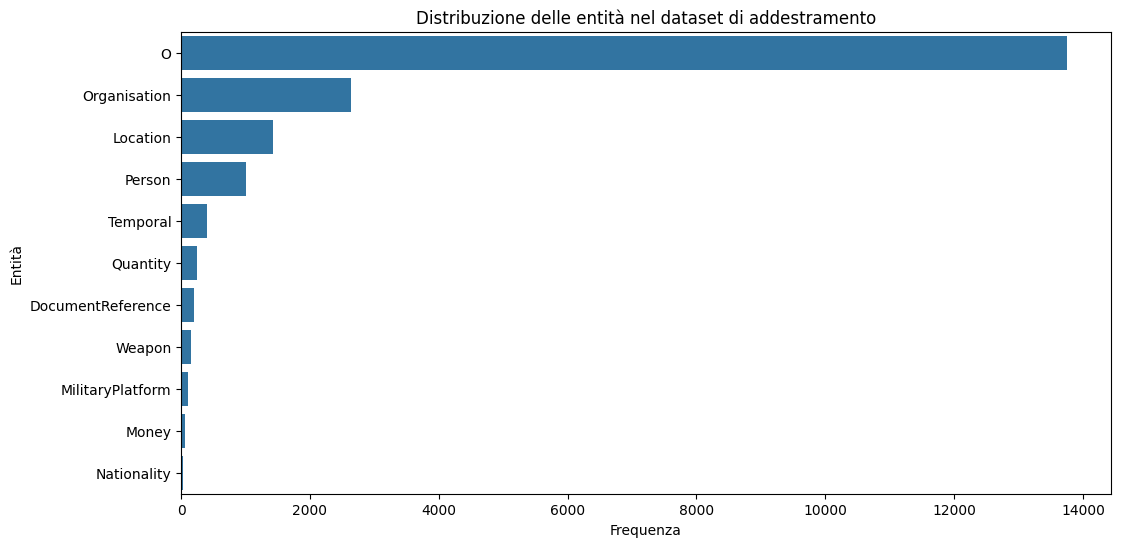

In [ ]:
# Distribution of entities in the dataset
plt.figure(figsize=(12, 6))
sns.countplot(y='Entity', data=train_df, order=train_df['Entity'].value_counts().index)
plt.title('Distribution of entities in the training dataset')
plt.xlabel('Frequency')
plt.ylabel('Entity')
plt.show()


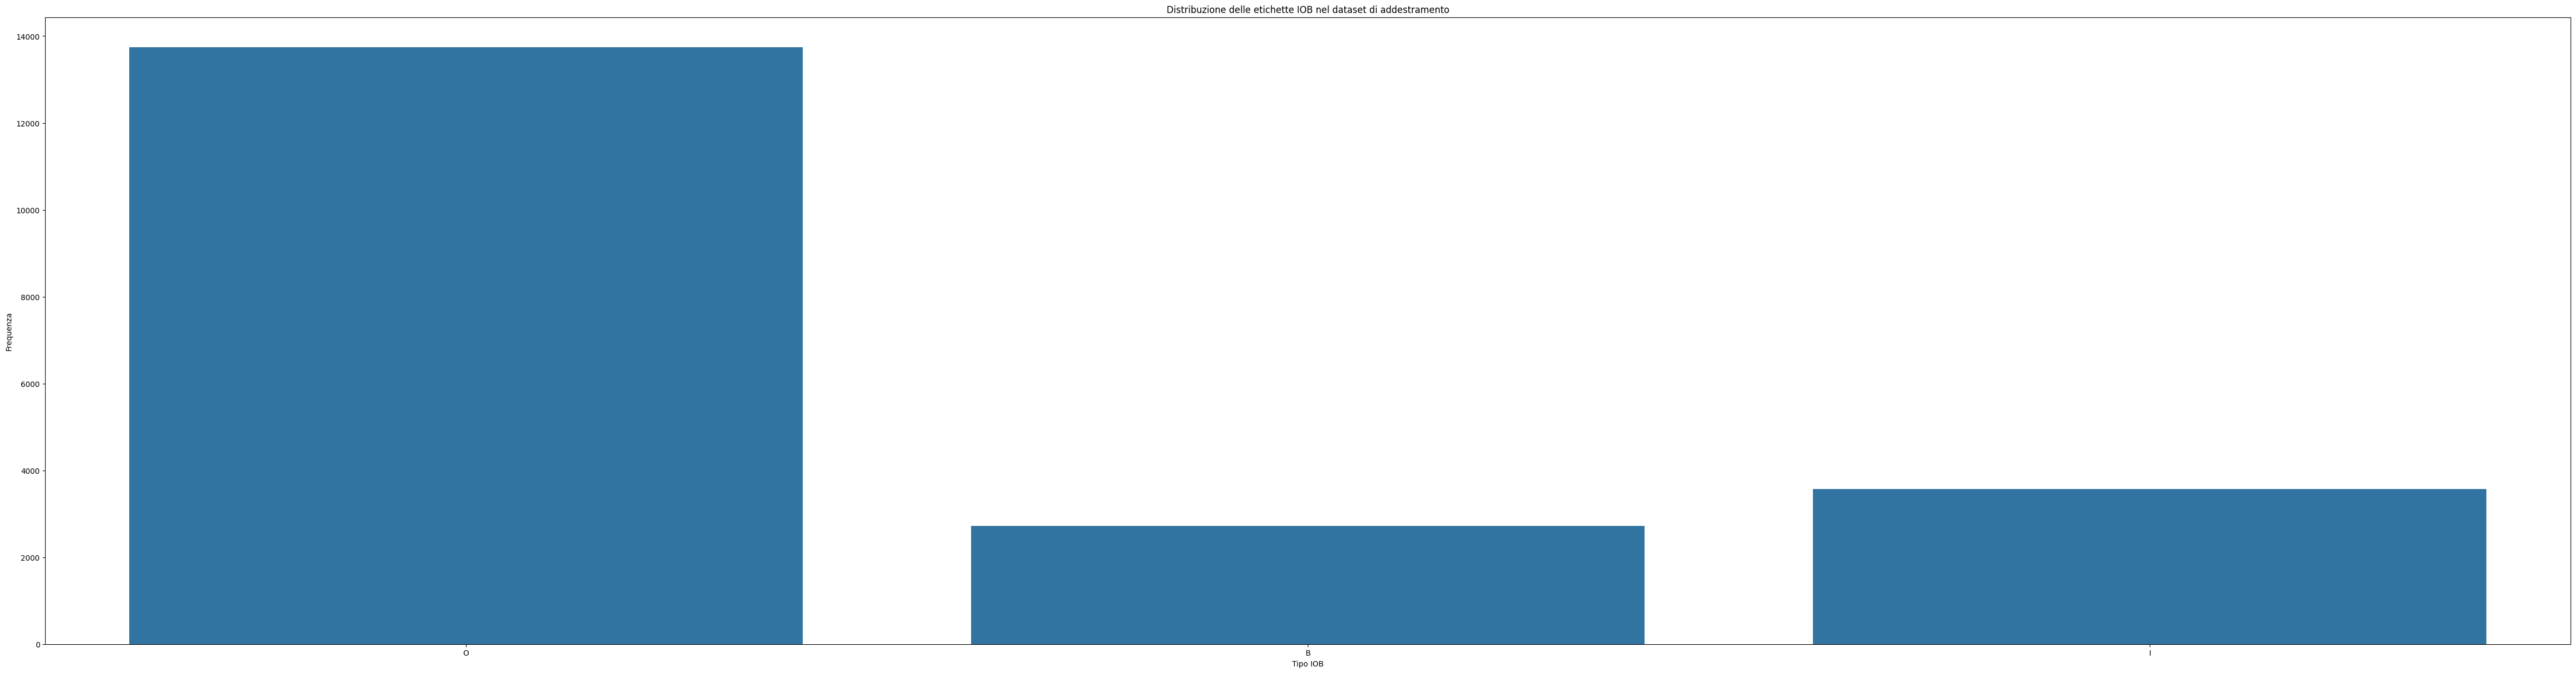

In [ ]:
# Distribution of IOB labels in the dataset
plt.figure(figsize=(60, 15))
sns.countplot(x='IOB', data=train_df)
plt.title('Distribution of IOB labels in the training dataset')
plt.xlabel('IOB type')
plt.ylabel('Frequency')
plt.show()

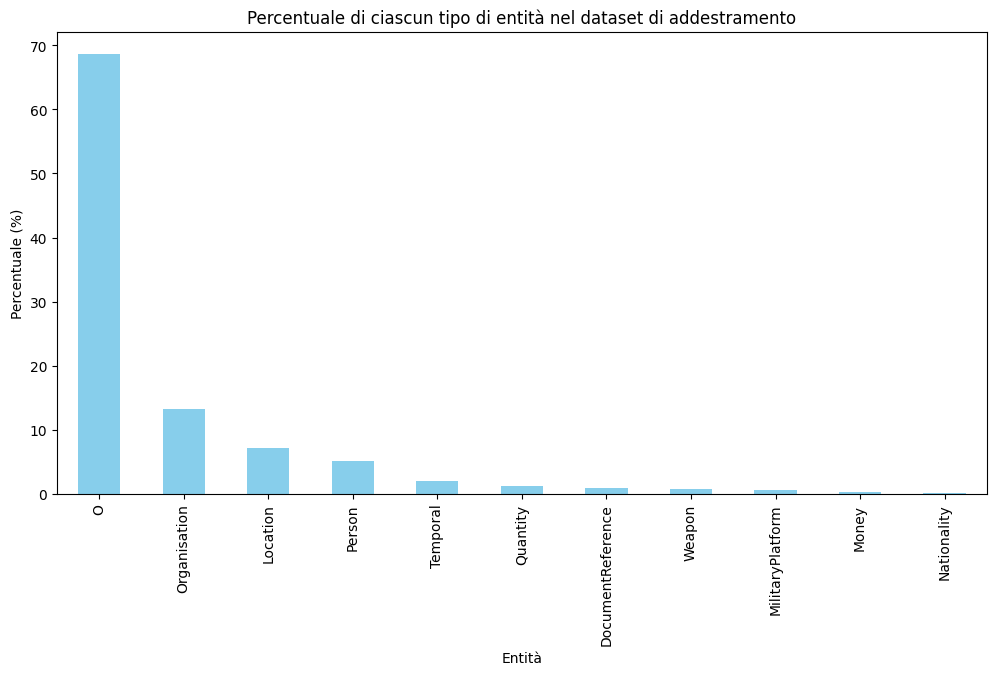

In [ ]:
# Percentage of entities by type
entity_percentage = train_df['Entity'].value_counts(normalize=True) * 100
entity_percentage = entity_percentage.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
entity_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of each entity type in the training dataset')
plt.xlabel('Entity')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Check for missing data
print("\nChecking for missing data in the training dataset:")
print(train_df.isnull().sum())


Verifica dei dati mancanti nel dataset di addestramento:
Word      0
IOB       0
Entity    0
dtype: int64


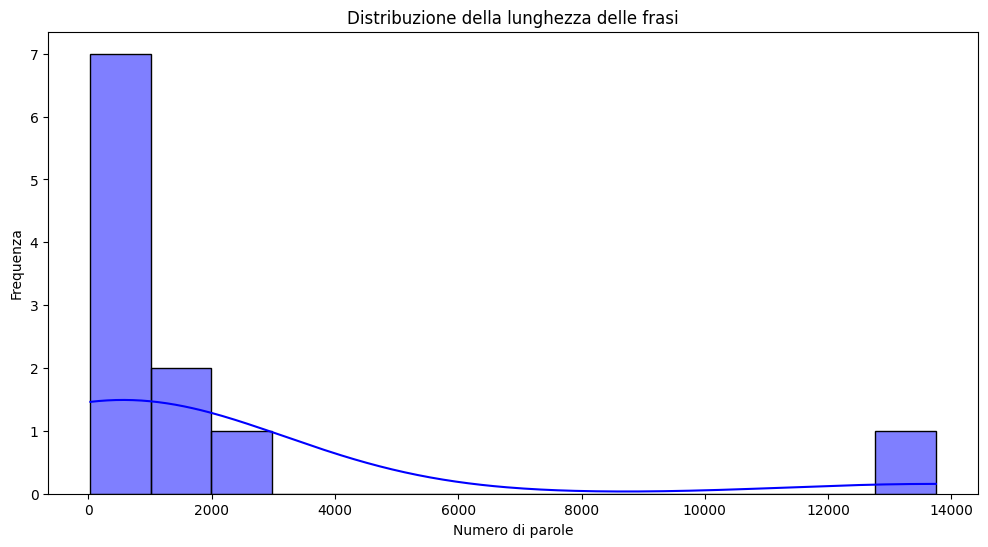

In [ ]:
# Sentence length analysis (in terms of number of words)
sentence_lengths = train_df.groupby('Entity').size()

plt.figure(figsize=(12, 6))
sns.histplot(sentence_lengths, kde=True, color='blue')
plt.title('Sentence length distribution')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

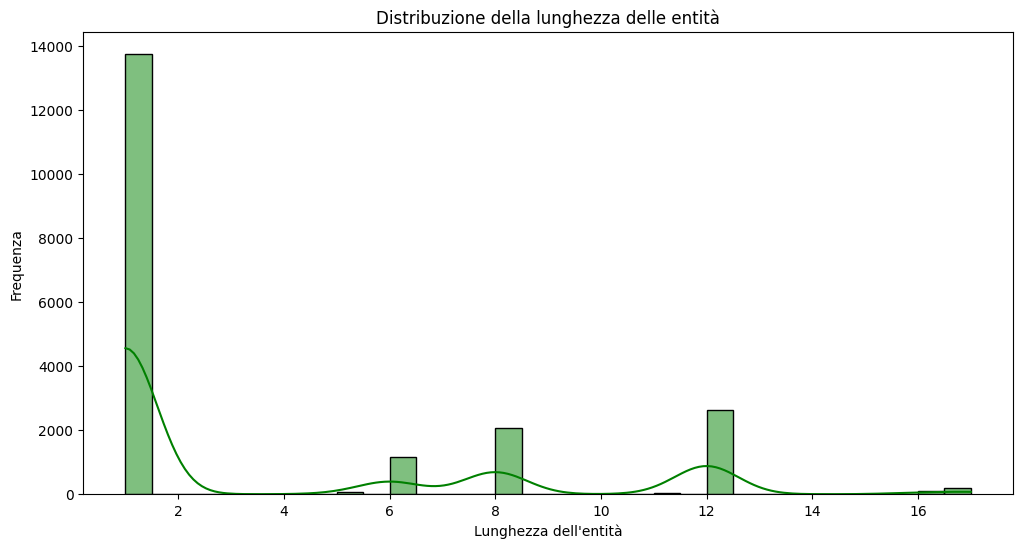

In [ ]:
# Entity Length Analysis
entity_lengths = train_df['Entity'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(entity_lengths, kde=True, color='green')
plt.title('Entity length distribution')
plt.xlabel('Entity length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Analysis of some specific entities
person_entities = train_df[train_df['Entity'] == 'Person']
print(f"\nEntity of type 'Person' in the training dataset:\n{person_entities.head(10)}")


Entità di tipo 'Person' nel dataset di addestramento:
          Word IOB  Entity
90          my   B  Person
125     Sheikh   B  Person
126        Abu   I  Person
127       Omar   I  Person
128         al   I  Person
129          -   I  Person
130     Ansari   I  Person
165      Iraqi   B  Person
166  President   I  Person
167       Fuad   I  Person
